# **CREDIT RISK MODELING - BUSINESS UNDERSTANDING**

**Problem:** Predict loan approval probability to minimize default risk

**Success Metrics:** Precision, Recall, AUC-ROC, Business KPIs (approval rate, expected loss)

**Target Variable:** Approved_Flag (P1=Low Risk, P2=Medium, P3=High, P4=Very High Risk)

**Business Context:** Financial institution loan approval decision support

## 🔎 Data Inspection, Cleaning, and Merging Overview

In this section, we prepare and validate the **Internal Bank Dataset**, **External CIBIL Dataset**, and the **Unseen Dataset** before merging them into a unified dataset for further modeling.  

The workflow ensures **data quality, consistency, and integrity** by checking merge keys, duplicates, missing values, and overlaps across datasets.

# **Data Loading and Initial Inspection**
This section loads the datasets and performs initial validation, including shape checks, duplicate identification, and sample data display.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

**Load Datasets**
   - Load internal, external, and unseen CSV datasets into Pandas DataFrames.
   - Purpose: bring raw data into the Colab environment for inspection and processing.

In [2]:
# upload datasets (csv files) into colab environment

internal_df = pd.read_excel("Internal_Bank_Dataset.xlsx")
external_df = pd.read_excel("External_Cibil_Dataset.xlsx")
unseen_df = pd.read_excel("Unseen_Dataset.xlsx")

In [3]:
'''

# Convert Excel files to CSV while preserving all data
def excel_to_csv_safe(excel_filename, csv_filename):
    """
    Convert Excel to CSV without losing data
    """
    # Read Excel with all data preserved
    df = pd.read_excel(excel_filename,
                      keep_default_na=False,    # Preserve empty cells as empty strings
                      na_filter=False)          # Don't convert strings like 'NA' to NaN

    # Save to CSV with all data intact
    df.to_csv(csv_filename,
              index=False,           # Don't save row indices
              encoding='utf-8')      # Use UTF-8 encoding for special characters

    print(f"✅ Converted {excel_filename} → {csv_filename}")
    print(f"   Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    return df

# Convert all three files
internal_df = excel_to_csv_safe("Internal_Bank_Dataset.xlsx", "Internal_Bank_Dataset.csv")
external_df = excel_to_csv_safe("External_Cibil_Dataset.xlsx", "External_Cibil_Dataset.csv")
unseen_df = excel_to_csv_safe("Unseen_Dataset.xlsx", "Unseen_Dataset.csv")

'''

'\n\n# Convert Excel files to CSV while preserving all data\ndef excel_to_csv_safe(excel_filename, csv_filename):\n    """\n    Convert Excel to CSV without losing data\n    """\n    # Read Excel with all data preserved\n    df = pd.read_excel(excel_filename,\n                      keep_default_na=False,    # Preserve empty cells as empty strings\n                      na_filter=False)          # Don\'t convert strings like \'NA\' to NaN\n\n    # Save to CSV with all data intact\n    df.to_csv(csv_filename,\n              index=False,           # Don\'t save row indices\n              encoding=\'utf-8\')      # Use UTF-8 encoding for special characters\n\n    print(f"✅ Converted {excel_filename} → {csv_filename}")\n    print(f"   Shape: {df.shape[0]} rows × {df.shape[1]} columns")\n    return df\n\n# Convert all three files\ninternal_df = excel_to_csv_safe("Internal_Bank_Dataset.xlsx", "Internal_Bank_Dataset.csv")\nexternal_df = excel_to_csv_safe("External_Cibil_Dataset.xlsx", "Externa

In [4]:
'''

# Verify the conversion preserved all data
def verify_conversion(excel_file, csv_file):
    """
    Verify that CSV contains the same data as Excel
    """
    excel_df = pd.read_excel(excel_file, keep_default_na=False, na_filter=False)
    csv_df = pd.read_csv(csv_file, keep_default_na=False, na_filter=False)

    print(f"📊 {excel_file} vs {csv_file}:")
    print(f"   Excel shape: {excel_df.shape}")
    print(f"   CSV shape: {csv_df.shape}")
    print(f"   Data identical: {excel_df.equals(csv_df)}")
    print()

# Verify all conversions
verify_conversion("Internal_Bank_Dataset.xlsx", "Internal_Bank_Dataset.csv")
verify_conversion("External_Cibil_Dataset.xlsx", "External_Cibil_Dataset.csv")
verify_conversion("Unseen_Dataset.xlsx", "Unseen_Dataset.csv")

'''

'\n\n# Verify the conversion preserved all data\ndef verify_conversion(excel_file, csv_file):\n    """\n    Verify that CSV contains the same data as Excel\n    """\n    excel_df = pd.read_excel(excel_file, keep_default_na=False, na_filter=False)\n    csv_df = pd.read_csv(csv_file, keep_default_na=False, na_filter=False)\n\n    print(f"📊 {excel_file} vs {csv_file}:")\n    print(f"   Excel shape: {excel_df.shape}")\n    print(f"   CSV shape: {csv_df.shape}")\n    print(f"   Data identical: {excel_df.equals(csv_df)}")\n    print()\n\n# Verify all conversions\nverify_conversion("Internal_Bank_Dataset.xlsx", "Internal_Bank_Dataset.csv")\nverify_conversion("External_Cibil_Dataset.xlsx", "External_Cibil_Dataset.csv")\nverify_conversion("Unseen_Dataset.xlsx", "Unseen_Dataset.csv")\n\n'

**Initial Validation & Sampling**

- Display 10 random rows from each dataset using .sample(10).

- Purpose: quick sanity check to verify file structure, values, and column alignment.

In [5]:
# display 10 random records for initial validation

print("Internal Bank Dataset:")
print(internal_df.sample(10), "\n")

print("External Cibil Dataset:")
print(external_df.sample(10), "\n")

print("Unseen Dataset:")
print(unseen_df.sample(10), "\n")

Internal Bank Dataset:
       PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  \
40652       40653         1              1              0   
44836       44837        18             16              2   
39670       39671         1              1              0   
6180         6181         1              1              0   
9940         9941         1              1              0   
28088       28089         1              1              0   
2319         2320         1              1              0   
8829         8830         4              3              1   
32598       32599         5              0              5   
6575         6576        14              5              9   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
40652                    0                  0            0.000   
44836                    0                  0            0.000   
39670                    0                  0            0.000   
6180                     0               

# **Check Columns and Basic Dataset Info**

**Dataset Structure and Statistics**

- View column names and dataset metadata.

- Use .describe() for summary statistics and .info() for column types and null counts.

- Purpose: understand schema, distributions, and data types.

In [6]:
print("Internal columns:", internal_df.columns.tolist())
print("External columns:", external_df.columns.tolist())

print("Internal Dataset :-")
print(internal_df.describe())
print(internal_df.info())

print("External Dataset :-")
print(external_df.describe())
print(external_df.info())

Internal columns: ['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL']
External columns: ['PROSPECTID', 'time_since_recent_payment', 'time_since_first_deliquency', 'time_since_recent_deliquency', 'num_times_delinquent', 'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'C

# **Define Data Paths and Merging Setup**
Set path and Recheck data after merging

In [7]:
# define merge key and paths to datasets

merge_key = "PROSPECTID"

internal_path = Path("Internal_Bank_Dataset.csv")
external_path = Path("External_Cibil_Dataset.csv")
unseen_path = Path("Unseen_Dataset.csv")
merged_save_path = Path("merged_internal_external.csv")

In [8]:
# Check if merge key exists in both datasets

if merge_key not in internal_df.columns or merge_key not in external_df.columns:
    raise KeyError(f"Merge key '{merge_key}' missing in one of the files.")

# **Dataset Shape and Duplicate Checks**

**Duplicate Detection in Merge Key**

- Detect duplicate PROSPECTIDs using .duplicated().sum().

- Print sample duplicate IDs if they exist.

- Purpose: prevents one-to-many merges that could corrupt the dataset.

In [9]:
# Dataset shapes
print("Shapes: internal:", internal_df.shape, "external:", external_df.shape, "unseen:", unseen_df.shape)

# Detect duplicates in merge key
int_dup_count = internal_df[merge_key].duplicated().sum()
ext_dup_count = external_df[merge_key].duplicated().sum()
print(f"Duplicate PROSPECTID count -> internal: {int_dup_count}, external: {ext_dup_count}")

Shapes: internal: (51336, 26) external: (51336, 62) unseen: (100, 42)
Duplicate PROSPECTID count -> internal: 0, external: 0


In [10]:
# Show sample duplicate PROSPECTID entries if exists

if int_dup_count:
    print("Sample duplicate PROSPECTIDs in internal:\n",
          internal_df[internal_df[merge_key].duplicated()][merge_key].unique()[:10])
if ext_dup_count:
    print("Sample duplicate PROSPECTIDs in external:\n",
          external_df[external_df[merge_key].duplicated()][merge_key].unique()[:10])

# **Data Cleaning and Merging**
Replace Sentinel Values (-99999 as Sentinel as seen from sample())

In [11]:
# replace sentinel with NaN for cleaning

SENTINEL = -99999

internal_df.replace(SENTINEL, np.nan, inplace=True)
external_df.replace(SENTINEL, np.nan, inplace=True)
unseen_df.replace(SENTINEL, np.nan, inplace=True)

**Inner Merge of Datasets**

- Merge internal_df and external_df on PROSPECTID.

- Use suffixes (_int, _ext) to differentiate overlapping columns.

- Purpose: combine datasets only for common IDs.

In [12]:
# perform inner merge
merged_df = pd.merge(internal_df, external_df, on=merge_key, how="inner", suffixes=("_int", "_ext"))

# output shape and sample columns
print("Merged (inner) shape:", merged_df.shape)
print("Merged columns example:", merged_df.columns.tolist()[:20])

# show sample data
print("Merged sample rows:")
print(merged_df.sample(10))

# save merged dataset
merged_df.to_csv(merged_save_path, index=False)
print("Merged dataset saved to:", merged_save_path)

Merged (inner) shape: (51336, 87)
Merged columns example: ['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL']
Merged sample rows:
       PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  \
18631       18632         4              1              3   
16082       16083         2              0              2   
26809       26810         6              4              2   
9687         9688         1              0              1   
49656       49657         3              2              1   
29182       29183        29             23              6   
23367       23368         3              0              3   
15516       15517         8              6              2   
15141       15142         1   

**Merge Indicator for Outer Join Validation**

**Merge Indicator (Discrepancy Check)**

- Perform an outer merge with _merge indicator.

- Shows whether IDs exist in both datasets or only one.

- Purpose: identify mismatched records and data coverage.

In [13]:
# merge with indicator to check for discrepancies

indicator = pd.merge(internal_df[[merge_key]], external_df[[merge_key]], on=merge_key, how="outer", indicator=True)
print("Merge indicator counts (outer join):")
print(indicator['_merge'].value_counts().to_dict())

Merge indicator counts (outer join):
{'both': 51336, 'left_only': 0, 'right_only': 0}


# **Handling Unseen Dataset**


**Check PROSPECTID in Unseen Dataset**

 - If present, unseen can be merged later for predictions.

- If absent, it is feature-only → preprocessing pipeline must be applied separately.

- Purpose: prepare unseen data path for model inference.

In [14]:
# check PROSPECTID presence in unseen data

if 'PROSPECTID' in unseen_df.columns:
    print("Unseen dataset contains PROSPECTID. You can merge predictions on that key later.")
else:
    print("Unseen dataset does NOT contain PROSPECTID (contains only features). Keep unseen_df separate and apply same preprocessing pipeline before scoring.")

Unseen dataset does NOT contain PROSPECTID (contains only features). Keep unseen_df separate and apply same preprocessing pipeline before scoring.


# **Exploratory Data Analysis (EDA) & Visualization**
Load the merged dataset for analysis

In [15]:
df = pd.read_csv(merged_save_path)

*Basic Dataset Overview*
- Shape
- Columns & Data Types
- Target Distribution

In [16]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes.value_counts())

print("\nTarget variable distribution (Approved_Flag):\n", df['Approved_Flag'].value_counts())

Shape: (51336, 87)

Columns:
 Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
       'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std',
       'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_l

# **Visualizations: Distributions and Correlation**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set global plot style
plt.style.use('ggplot')

Text(0.5, 1.0, 'Approval Flag Distribution')

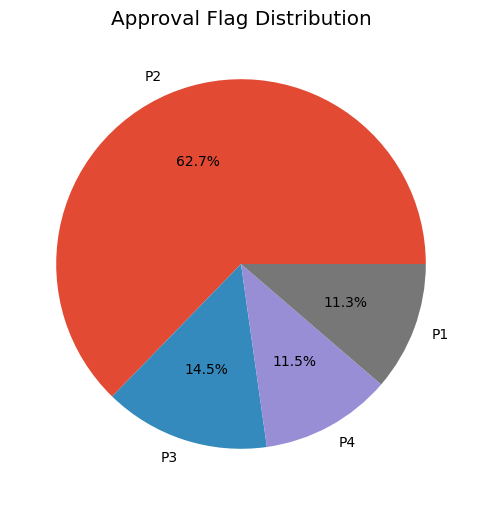

In [18]:
# Target distribution pie chart

plt.figure(figsize=(6, 6))
target_counts = df['Approved_Flag'].value_counts()
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Approval Flag Distribution')

Text(0.5, 1.0, 'Credit Score Distribution')

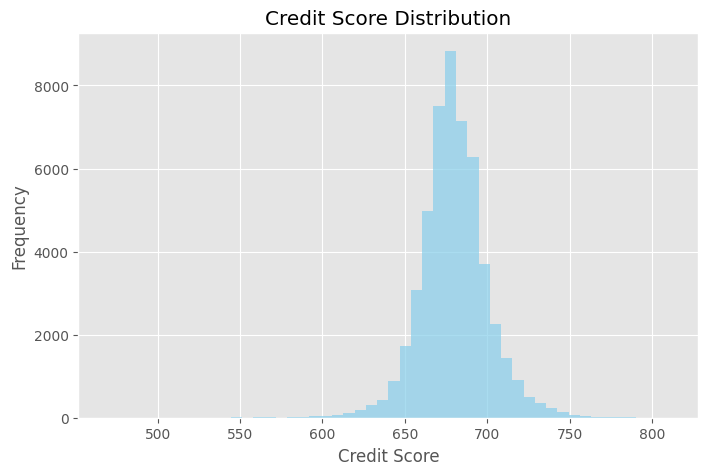

In [19]:
# Credit Score Distribution Histogram

plt.figure(figsize=(8, 5))
plt.hist(df['Credit_Score'].dropna(), bins=50, color='skyblue', alpha=0.7)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Score Distribution')

Text(0.5, 1.0, 'Net Monthly Income Distribution (Log Scale)')

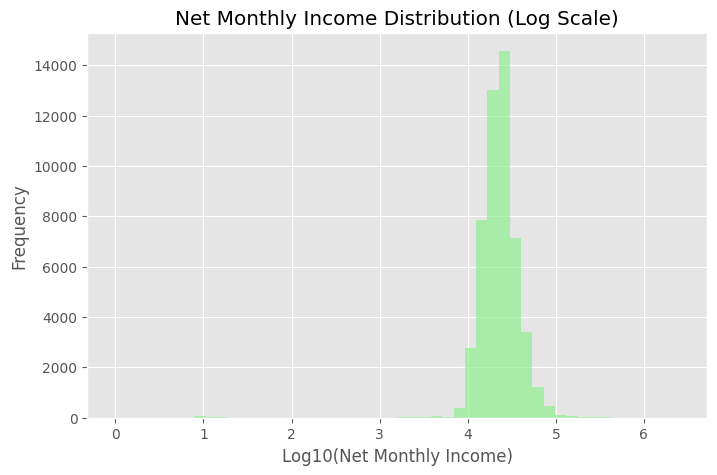

In [20]:
# Net Monthly Income Distribution (Log Scale)

plt.figure(figsize=(8, 5))
income_clean = df['NETMONTHLYINCOME'].dropna()
income_clean = income_clean[income_clean > 0]  # Filter positive values
plt.hist(np.log10(income_clean), bins=50, color='lightgreen', alpha=0.7)
plt.xlabel('Log10(Net Monthly Income)')
plt.ylabel('Frequency')
plt.title('Net Monthly Income Distribution (Log Scale)')

Text(0.5, 1.0, 'Age Distribution')

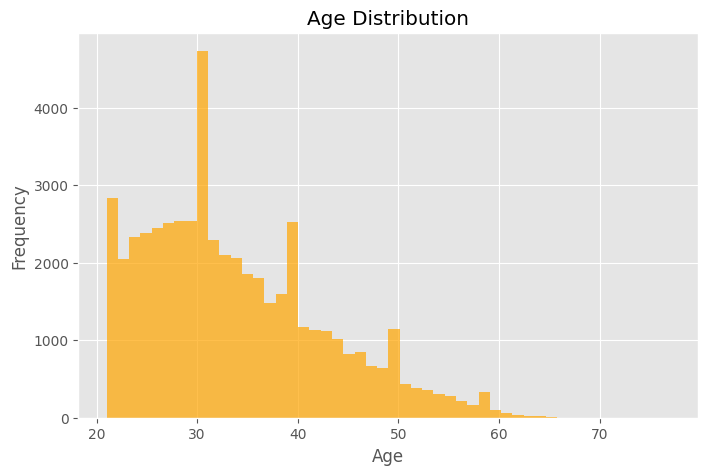

In [21]:
# Age Distribution Histogram

plt.figure(figsize=(8, 5))
plt.hist(df['AGE'].dropna(), bins=50, color='orange', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Total Trade Lines Distribution')

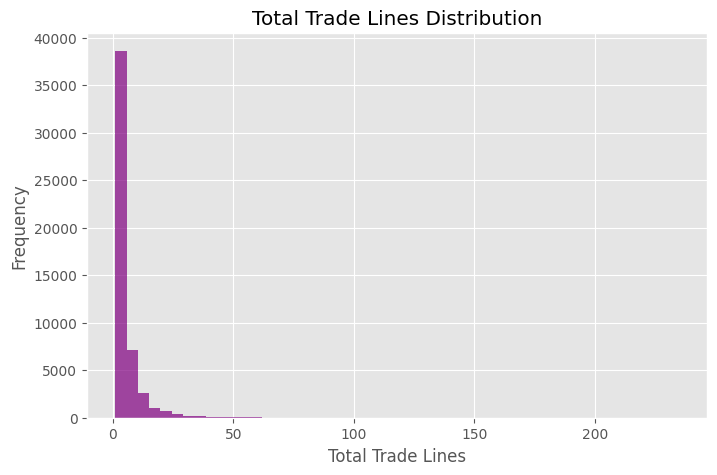

In [22]:
# Total Trade Lines Histogram

plt.figure(figsize=(8, 5))
plt.hist(df['Total_TL'].dropna(), bins=50, color='purple', alpha=0.7)
plt.xlabel('Total Trade Lines')
plt.ylabel('Frequency')
plt.title('Total Trade Lines Distribution')

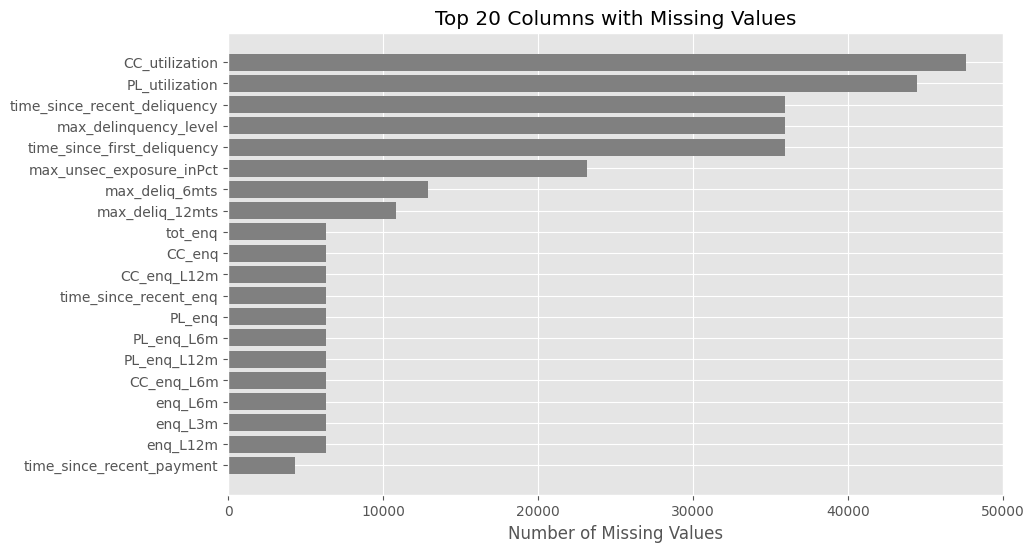

In [23]:
# Missing Values Heatmap (Top 20 columns with most missing values)

missing_data = df.isnull().sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
plt.barh(missing_data.index, missing_data.values, color='grey')
plt.xlabel('Number of Missing Values')
plt.title('Top 20 Columns with Missing Values')
plt.gca().invert_yaxis()

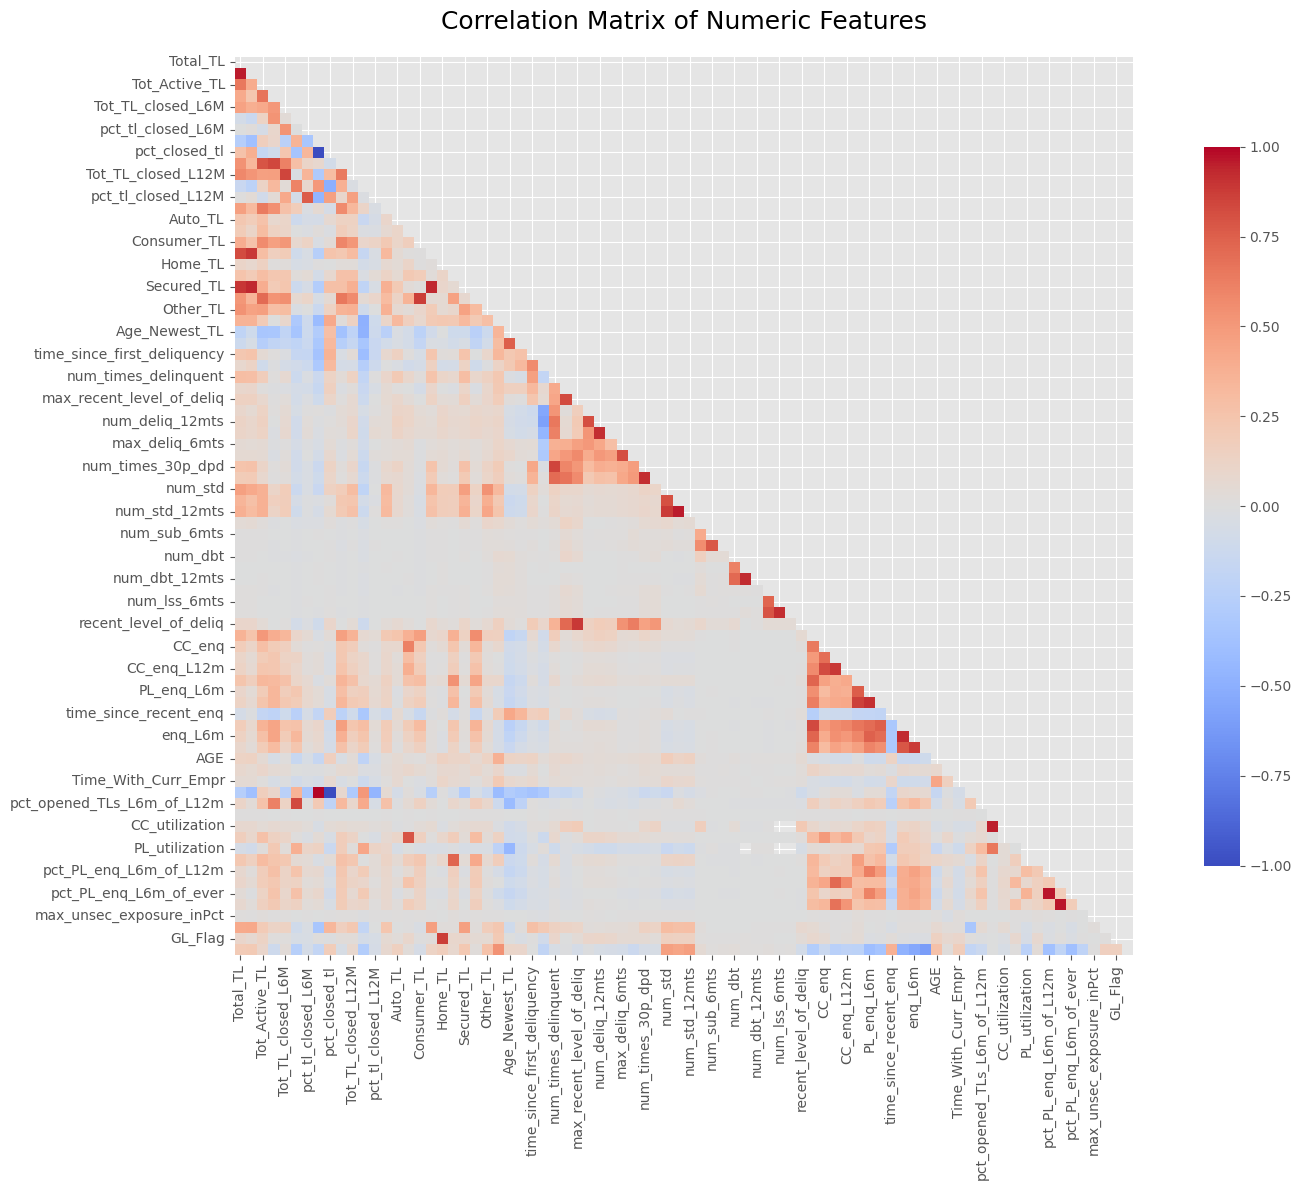

In [24]:
# Correlation Matrix Heatmap for Numeric Features

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'PROSPECTID' in numeric_cols:
    numeric_cols.remove('PROSPECTID')

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=False,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.2f',
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Matrix of Numeric Features', fontsize=18, pad=20)

plt.tight_layout()
plt.show()

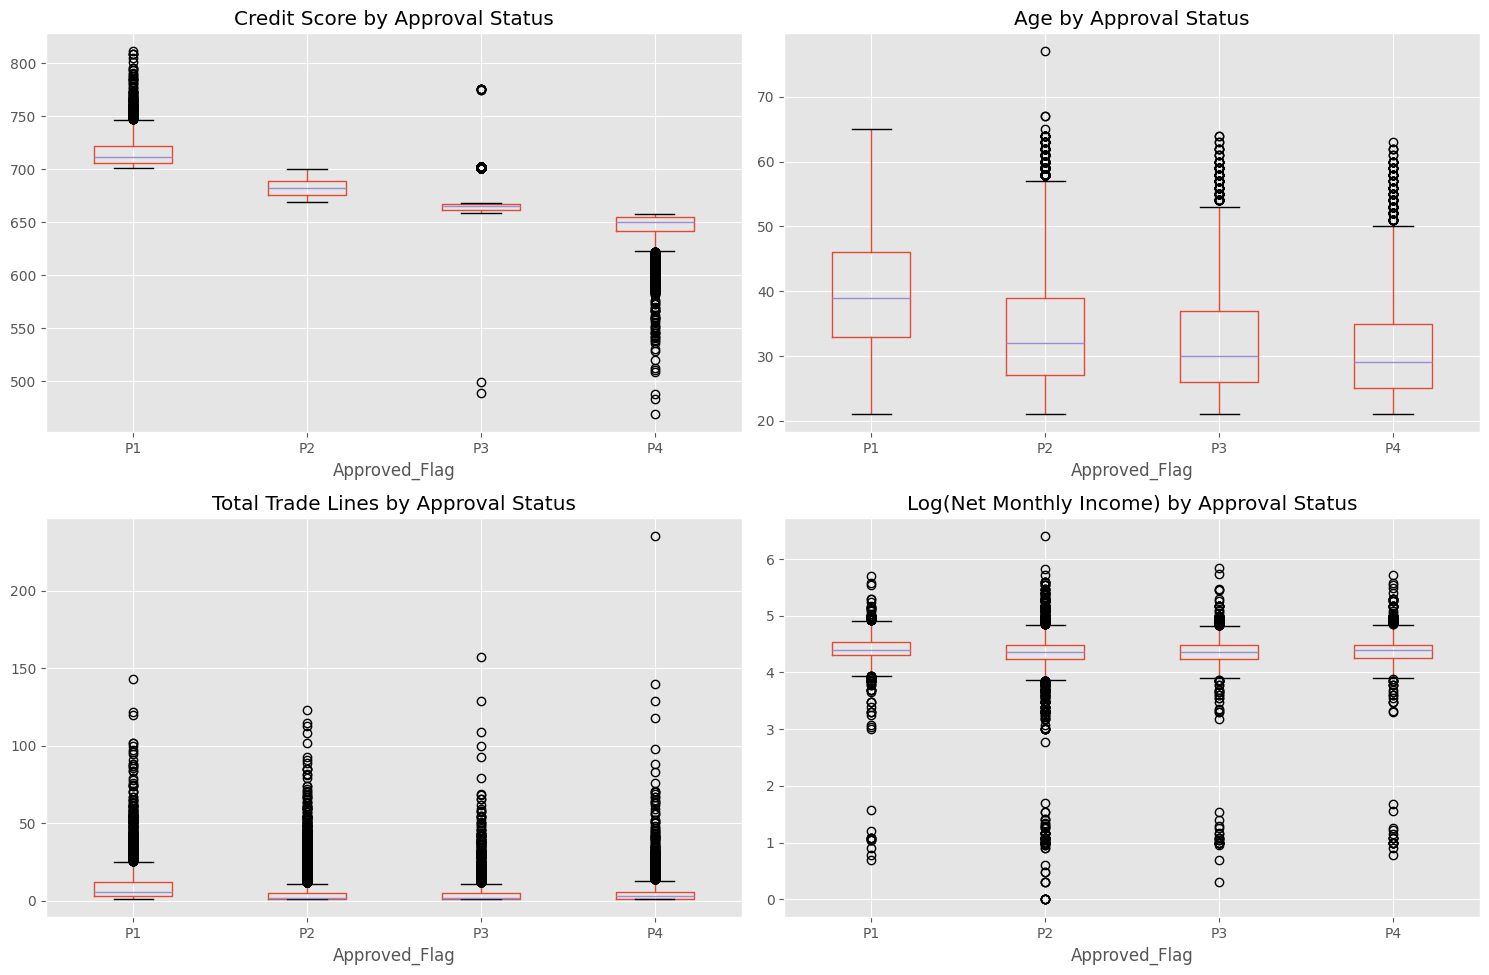

In [25]:
# Box Plots for Key Features by Approval Status
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
df.boxplot(column='Credit_Score', by='Approved_Flag', ax=axes[0, 0])
axes[0,0].set_title('Credit Score by Approval Status')
axes[0,0].set_xlabel('Approved_Flag')

df.boxplot(column='AGE', by='Approved_Flag', ax=axes[0, 1])
axes[0,1].set_title('Age by Approval Status')
axes[0,1].set_xlabel('Approved_Flag')

df.boxplot(column='Total_TL', by='Approved_Flag', ax=axes[1, 0])
axes[1,0].set_title('Total Trade Lines by Approval Status')
axes[1,0].set_xlabel('Approved_Flag')

# Log of Net Monthly Income
income_plot = df[df['NETMONTHLYINCOME'] > 0].copy()
income_plot['Log_Income'] = np.log10(income_plot['NETMONTHLYINCOME'])
income_plot.boxplot(column='Log_Income', by='Approved_Flag', ax=axes[1, 1])
axes[1,1].set_title('Log(Net Monthly Income) by Approval Status')
axes[1,1].set_xlabel('Approved_Flag')

plt.suptitle('')
plt.tight_layout()

# **Summary Statistics and Feature Analysis**
Providing descriptive stats for key variables stratified by target.

In [26]:
# Key statistics by target
print("=== Credit Score Statistics per Approval Flag ===")
print(df.groupby('Approved_Flag')['Credit_Score'].describe())

print("\n=== Age Statistics per Approval Flag ===")
print(df.groupby('Approved_Flag')['AGE'].describe())

print("\n=== Total Trade Lines per Approval Flag ===")
print(df.groupby('Approved_Flag')['Total_TL'].describe())

'''
# Active-to-total trade line ratio
df['Active_to_Total_Ratio'] = df['Tot_Active_TL'] / (df['Total_TL'] + 1e-6)
print("\n=== Active to Total Trade Line Ratio per Approval Flag ===")
print(df.groupby('Approved_Flag')['Active_to_Total_Ratio'].describe())
'''

=== Credit Score Statistics per Approval Flag ===
                 count        mean        std    min    25%    50%    75%  \
Approved_Flag                                                               
P1              5803.0  715.952266  13.485114  701.0  706.0  712.0  722.0   
P2             32199.0  682.584614   8.331576  669.0  676.0  682.0  689.0   
P3              7452.0  666.995035  11.301156  489.0  662.0  665.0  667.0   
P4              5882.0  645.629548  15.505251  469.0  642.0  650.0  655.0   

                 max  
Approved_Flag         
P1             811.0  
P2             700.0  
P3             776.0  
P4             658.0  

=== Age Statistics per Approval Flag ===
                 count       mean       std   min   25%   50%   75%   max
Approved_Flag                                                            
P1              5803.0  39.798035  8.877128  21.0  33.0  39.0  46.0  65.0
P2             32199.0  33.527408  8.644574  21.0  27.0  32.0  39.0  77.0
P3         

'\n# Active-to-total trade line ratio\ndf[\'Active_to_Total_Ratio\'] = df[\'Tot_Active_TL\'] / (df[\'Total_TL\'] + 1e-6)\nprint("\n=== Active to Total Trade Line Ratio per Approval Flag ===")\nprint(df.groupby(\'Approved_Flag\')[\'Active_to_Total_Ratio\'].describe())\n'

# **Categorical Variables Analysis**
Examine distribution across categories.


=== MARITALSTATUS Distribution by Approval Flag ===
Approved_Flag            P1             P2            P3            P4
MARITALSTATUS                                                         
Married        5215 (89.9%)  23697 (73.6%)  5087 (68.3%)  3753 (63.8%)
Single          588 (10.1%)   8502 (26.4%)  2365 (31.7%)  2129 (36.2%)


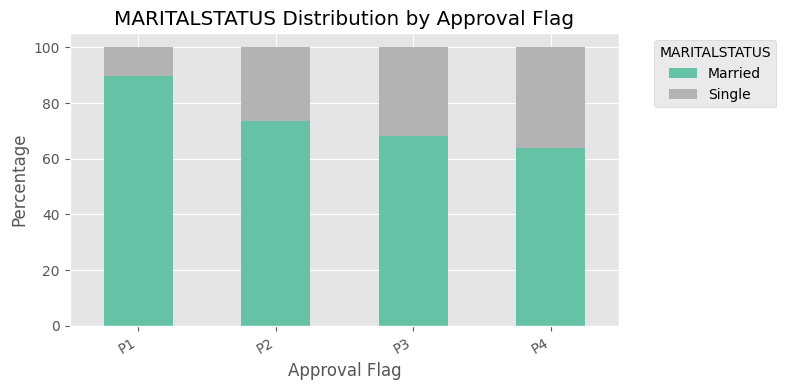


=== EDUCATION Distribution by Approval Flag ===
Approved_Flag             P1             P2            P3            P4
EDUCATION                                                              
12TH            1430 (24.6%)   9347 (29.0%)  2196 (29.5%)  1494 (25.4%)
GRADUATE        1994 (34.4%)  10086 (31.3%)  2433 (32.6%)  2160 (36.7%)
OTHERS            381 (6.6%)    1878 (5.8%)    379 (5.1%)    279 (4.7%)
POST-GRADUATE     348 (6.0%)    1353 (4.2%)    289 (3.9%)    252 (4.3%)
PROFESSIONAL       52 (0.9%)     160 (0.5%)     41 (0.6%)     16 (0.3%)
SSC              982 (16.9%)   6014 (18.7%)  1305 (17.5%)   975 (16.6%)
UNDER GRADUATE   616 (10.6%)   3361 (10.4%)   809 (10.9%)   706 (12.0%)


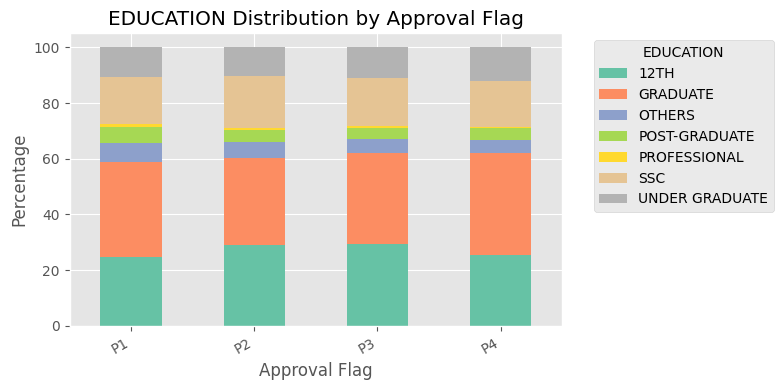


=== GENDER Distribution by Approval Flag ===
Approved_Flag            P1             P2            P3            P4
GENDER                                                                
F               609 (10.5%)   3951 (12.3%)   881 (11.8%)   650 (11.1%)
M              5194 (89.5%)  28248 (87.7%)  6571 (88.2%)  5232 (88.9%)


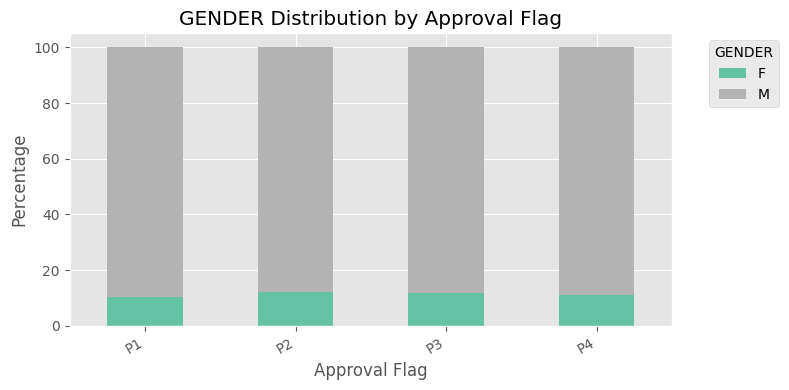


=== last_prod_enq2 Distribution by Approval Flag ===
Approved_Flag             P1             P2            P3            P4
last_prod_enq2                                                         
AL                341 (5.9%)     972 (3.0%)    133 (1.8%)     65 (1.1%)
CC                314 (5.4%)    1416 (4.4%)    310 (4.2%)    299 (5.1%)
ConsumerLoan    1224 (21.1%)   9902 (30.8%)  3436 (46.1%)  3231 (54.9%)
HL                244 (4.2%)     569 (1.8%)     69 (0.9%)     21 (0.4%)
PL               902 (15.5%)   4358 (13.5%)  1475 (19.8%)  1224 (20.8%)
others          2778 (47.9%)  14982 (46.5%)  2029 (27.2%)  1042 (17.7%)


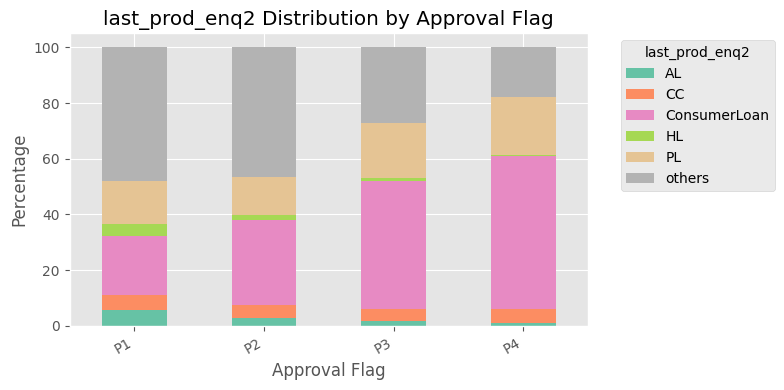


=== first_prod_enq2 Distribution by Approval Flag ===
Approved_Flag              P1             P2            P3            P4
first_prod_enq2                                                         
AL                 527 (9.1%)    1753 (5.4%)    327 (4.4%)    263 (4.5%)
CC                 262 (4.5%)    1191 (3.7%)    339 (4.5%)    396 (6.7%)
ConsumerLoan      660 (11.4%)   7077 (22.0%)  2153 (28.9%)  1970 (33.5%)
HL                 356 (6.1%)     824 (2.6%)    144 (1.9%)     85 (1.4%)
PL                777 (13.4%)    2592 (8.0%)   804 (10.8%)   716 (12.2%)
others           3221 (55.5%)  18762 (58.3%)  3685 (49.4%)  2452 (41.7%)


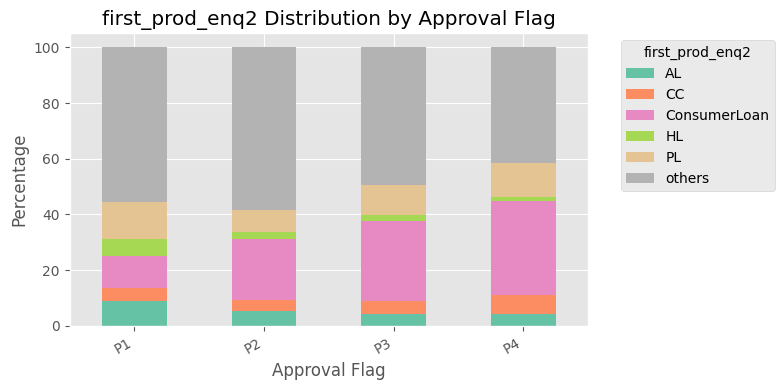

In [27]:
# Automatically detect categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude target column if present
if 'Approved_Flag' in categorical_cols:
    categorical_cols.remove('Approved_Flag')

for col in categorical_cols:
    if col in df.columns:
        print(f"\n=== {col} Distribution by Approval Flag ===")

        # Crosstab: counts
        counts = pd.crosstab(df[col], df['Approved_Flag'])

        # Crosstab: percentages
        percentages = pd.crosstab(df[col], df['Approved_Flag'], normalize='columns') * 100

        # Merge counts + percentages into one table
        summary = counts.astype(str) + " (" + percentages.round(1).astype(str) + "%)"
        print(summary)

        # Plot stacked bar chart
        ax = (percentages.T).plot(
            kind="bar",
            stacked=True,
            figsize=(8, 4),
            colormap="Set2"
        )
        plt.title(f"{col} Distribution by Approval Flag")
        plt.ylabel("Percentage")
        plt.xlabel("Approval Flag")

        # 🔑 Tilt x-axis labels
        plt.xticks(rotation=30, ha="right")

        plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

# **Missing Values Analysis by Target**
Identify variables with missing data stratified by target class.

In [28]:
missing_by_target = (
    df.drop(columns=['Approved_Flag'])
      .groupby(df['Approved_Flag'])
      .apply(lambda x: x.isnull().sum())
      .T
)

missing_by_target_pct = (
    df.drop(columns=['Approved_Flag'])
      .groupby(df['Approved_Flag'])
      .apply(lambda x: x.isnull().mean() * 100)
      .T
)

# sort the missingness across all target classes
top_missing = (
    missing_by_target_pct
    .assign(Max_Missing=lambda x: x.max(axis=1))   # new col = max missing %
    .sort_values(by='Max_Missing', ascending=False)
    .drop(columns=['Max_Missing'])
    .head(10)
)

=== Missing Value Percentages by Approval Flag (Top 10 across all classes) ===


Approved_Flag,P1,P2,P3,P4
CC_utilization,90.38,93.79,92.26,90.38
PL_utilization,80.70,88.30,87.14,82.03
time_since_first_deliquency,75.12,76.74,55.84,46.21
time_since_recent_deliquency,75.12,76.74,55.84,46.21
max_delinquency_level,75.12,76.74,55.84,46.21
max_unsec_exposure_inPct,41.17,49.36,39.96,32.61
max_deliq_6mts,33.83,27.01,17.74,15.44
max_deliq_12mts,29.59,22.94,13.90,11.80
CC_enq,13.91,15.43,5.19,2.72
CC_enq_L6m,13.91,15.43,5.19,2.72


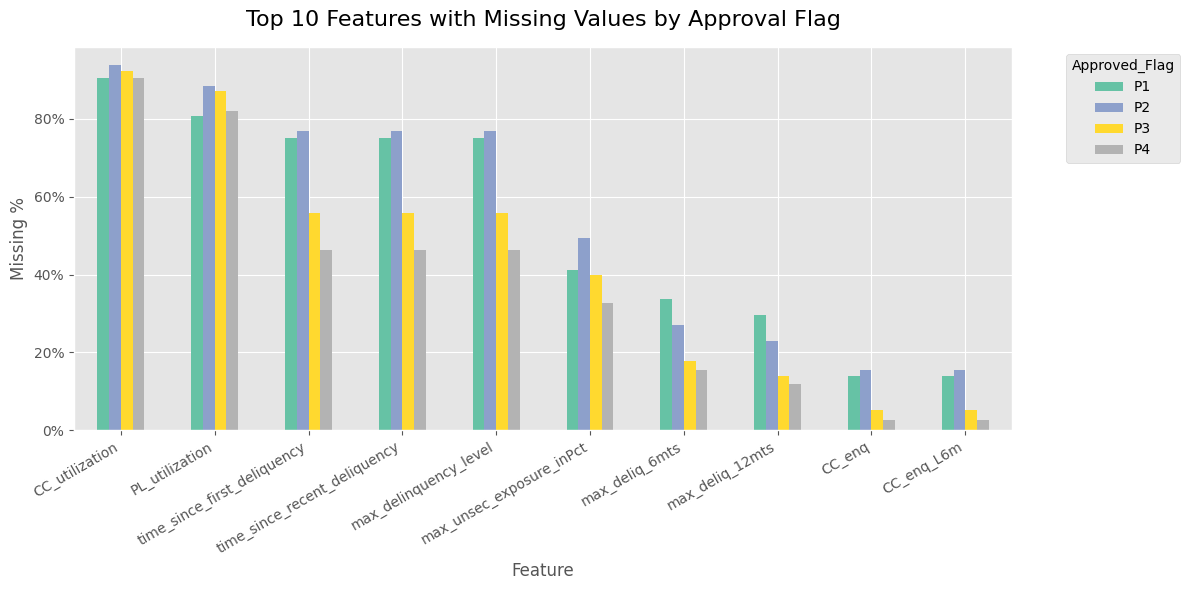

In [29]:
print("=== Missing Value Percentages by Approval Flag (Top 10 across all classes) ===")
display(top_missing.round(2))

# --- Visualization ---
ax = top_missing.plot(kind="bar", figsize=(12, 6), colormap="Set2")

plt.title("Top 10 Features with Missing Values by Approval Flag", fontsize=16, pad=15)
plt.ylabel("Missing %")
plt.xlabel("Feature")
plt.xticks(rotation=30, ha="right")

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.legend(title="Approved_Flag", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

# **Data Quality Summary**
Summary statistics for dataset integrity.

In [30]:
total_records = len(df)
total_features = len(df.columns)
numeric_features = len(numeric_cols)
categorical_features = len(categorical_cols)
missing_percentage = df.isnull().sum().sum() / (total_records * total_features) * 100

print(f"Total records: {total_records}")
print(f"Total features: {total_features}")
print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")
print(f"Overall missing value percentage: {missing_percentage:.2f}%")

Total records: 51336
Total features: 87
Numeric features: 80
Categorical features: 5
Overall missing value percentage: 7.18%


In [31]:
# Features with >50% missing data

high_missing = df.isnull().sum() / total_records * 100
high_missing_features = high_missing[high_missing > 50]

if not high_missing_features.empty:
    print(f"\nFeatures with >50% missing values ({len(high_missing_features)} features):")
    print(high_missing_features.sort_values(ascending=False))
else:
    print("\nNo features with >50% missing values found.")


Features with >50% missing values (5 features):
CC_utilization                  92.792582
PL_utilization                  86.557192
time_since_first_deliquency     70.026882
max_delinquency_level           70.026882
time_since_recent_deliquency    70.026882
dtype: float64


# Handling Missing Values
Using Iterative Imputer for Bayesian Ridge Imputation

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [33]:
# make a new dataframe after handling missing values

df_reg = df.copy()

num_cols = df_reg.select_dtypes(include=[np.number]).columns
cat_cols = df_reg.select_dtypes(exclude=[np.number]).columns

In [34]:
# encode categorical data for imputation

le_dict = {} # store imputations

for col in cat_cols:
    le = LabelEncoder()
    df_reg[col] = df_reg[col].astype(str)
    df_reg[col] = le.fit_transform(df_reg[col])
    le_dict[col] = le

In [35]:
imputer = IterativeImputer(random_state=17, max_iter=10, sample_posterior=False) # check random value
df_reg[num_cols] = imputer.fit_transform(df_reg[num_cols])

In [36]:
# decode transformed cols back to categorical

for col in cat_cols:
    df_reg[col] = le_dict[col].inverse_transform(df_reg[col].astype(int))

Text(0.5, 1.0, 'Missing Values Heatmap')

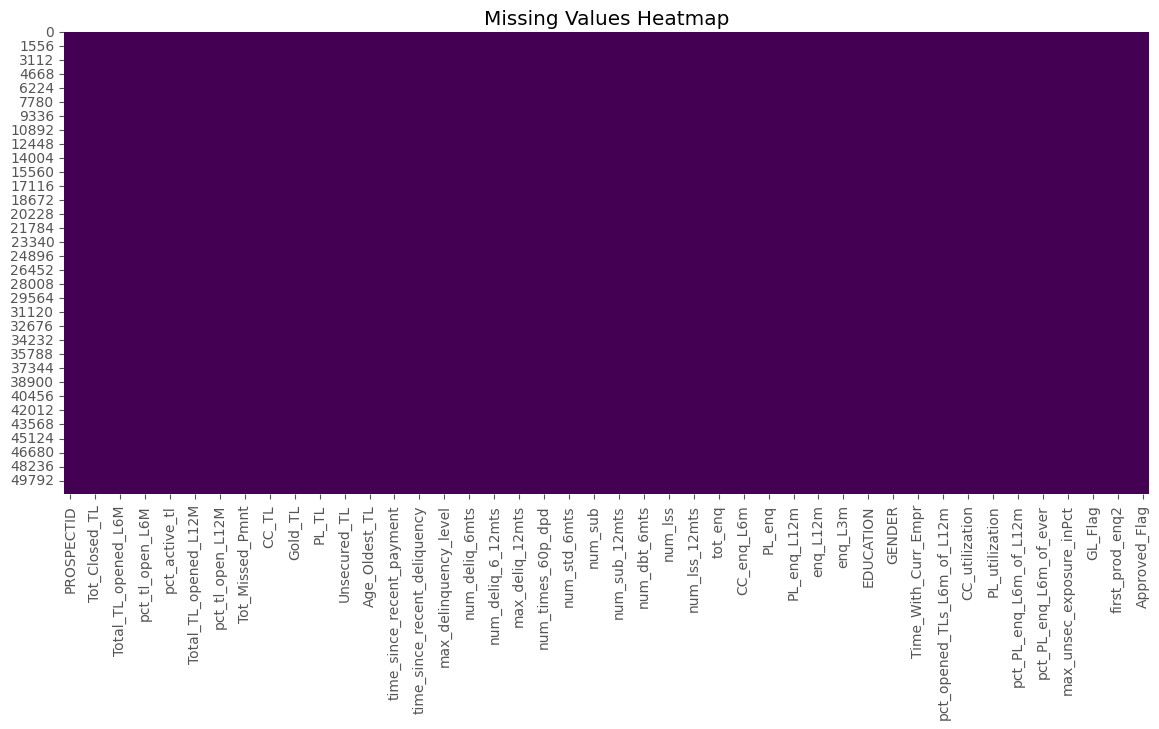

In [37]:
# check imputation results

plt.figure(figsize=(14,6))
sns.heatmap(df_reg.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")

In [38]:
df_reg.to_csv("merged_regression_imputed.csv", index=False)
print("Regression-imputed dataset saved as merged_regression_imputed.csv")

Regression-imputed dataset saved as merged_regression_imputed.csv


# Outlier Elimination
Based on BoxCox Plots and Percentile Clip

In [39]:
from scipy.stats import boxcox

In [40]:
# setup outlier detection from numerical columns

df_out = df_reg.copy()
num_cols = df_out.select_dtypes(include=[np.number]).columns

outlier_report = {}
transformation_report = {}

In [41]:
for col in num_cols:

    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)

    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df_out[col] < lower) | (df_out[col] > upper)).sum()
    pct_outliers = 100 * outliers / df_out.shape[0]
    outlier_report[col] = pct_outliers

In [42]:
# show outlier percentage

outlier_df = pd.DataFrame.from_dict(outlier_report, orient='index', columns=['% Outliers'])
print("Outlier percentage per numeric column:\n", outlier_df.sort_values('% Outliers', ascending=False))

Outlier percentage per numeric column:
                             % Outliers
max_deliq_6mts               34.424186
max_deliq_12mts              26.591476
CC_enq_L12m                  22.933224
num_std_6mts                 22.043011
pct_PL_enq_L6m_of_ever       21.622253
...                                ...
PROSPECTID                    0.000000
pct_closed_tl                 0.000000
pct_opened_TLs_L6m_of_L12m    0.000000
pct_of_active_TLs_ever        0.000000
HL_Flag                       0.000000

[81 rows x 1 columns]


In [43]:
for col in num_cols:
    skew = df_out[col].skew()
    pct_outliers = outlier_df.loc[col, '% Outliers']

    if pct_outliers > 5:  # Significant outliers
        if skew > 1:
            # Try Box-Cox (requires strictly positive values)
            if (df_out[col] > 0).all():
                df_out[col], _ = boxcox(df_out[col])  # Box-Cox transform
                transformation_report[col] = f"Box-Cox (skew={skew:.2f}, outliers={pct_outliers:.1f}%)"
            else:
                df_out[col] = np.log1p(df_out[col] - df_out[col].min() + 1)
                transformation_report[col] = f"log1p (skew={skew:.2f}, outliers={pct_outliers:.1f}%)"
        else:
            # Clip at 1st and 99th percentile
            Q1 = df_out[col].quantile(0.01)
            Q99 = df_out[col].quantile(0.99)
            df_out[col] = df_out[col].clip(Q1, Q99)
            transformation_report[col] = f"Clipped at 1st-99th pct (skew={skew:.2f}, outliers={pct_outliers:.1f}%)"
    else:
        transformation_report[col] = "No action (low outliers)"

In [44]:
summary_df = pd.DataFrame.from_dict(transformation_report, orient='index', columns=['Action Taken'])
print("\nSummary of transformations:\n", summary_df)


Summary of transformations:
                                                 Action Taken
PROSPECTID                          No action (low outliers)
Total_TL                  Box-Cox (skew=5.81, outliers=9.5%)
Tot_Closed_TL               log1p (skew=7.41, outliers=9.2%)
Tot_Active_TL                       No action (low outliers)
Total_TL_opened_L6M         log1p (skew=3.42, outliers=7.7%)
...                                                      ...
pct_CC_enq_L6m_of_ever      log1p (skew=3.85, outliers=7.7%)
max_unsec_exposure_inPct  log1p (skew=104.16, outliers=7.6%)
HL_Flag                             No action (low outliers)
GL_Flag                     log1p (skew=4.00, outliers=5.3%)
Credit_Score                        No action (low outliers)

[81 rows x 1 columns]


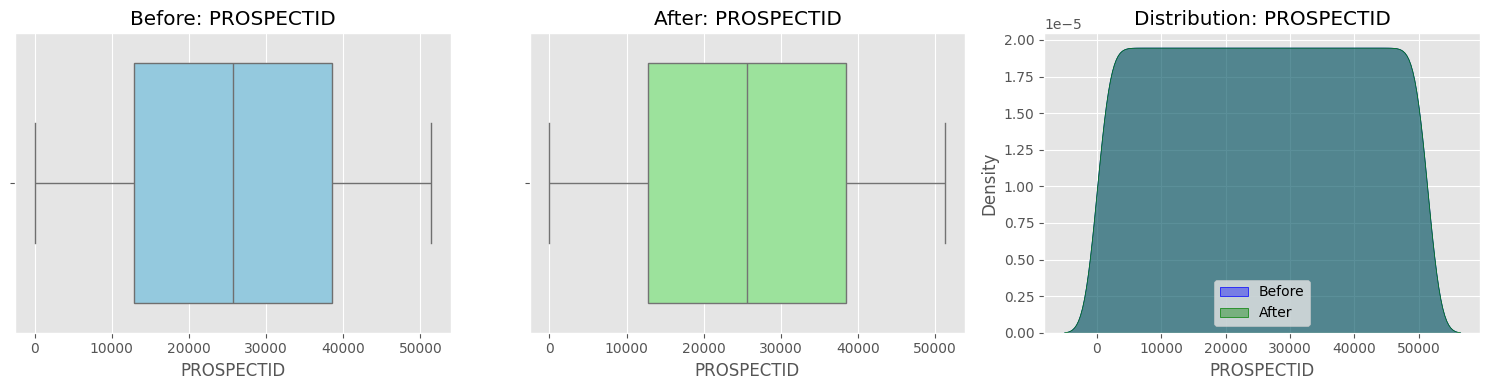

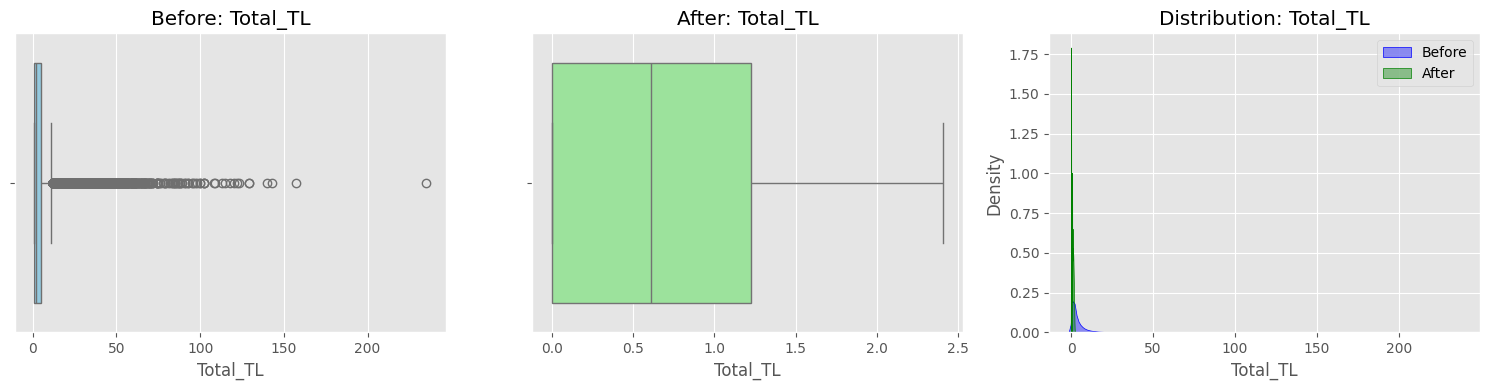

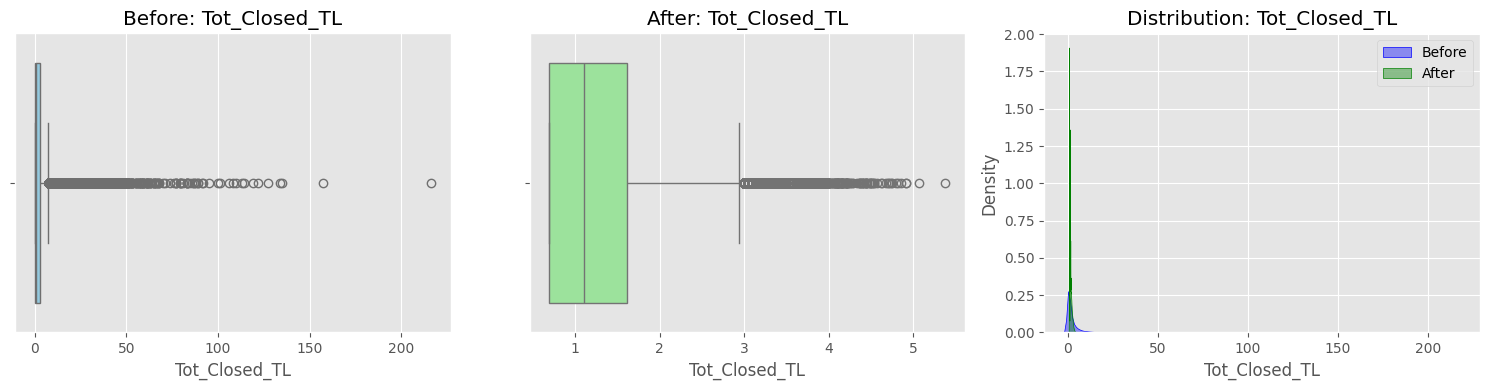

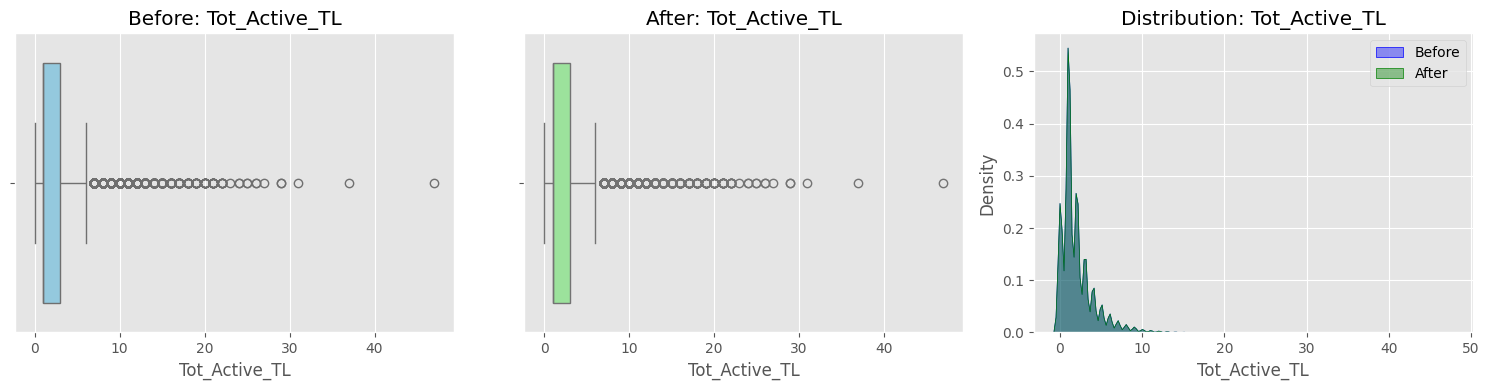

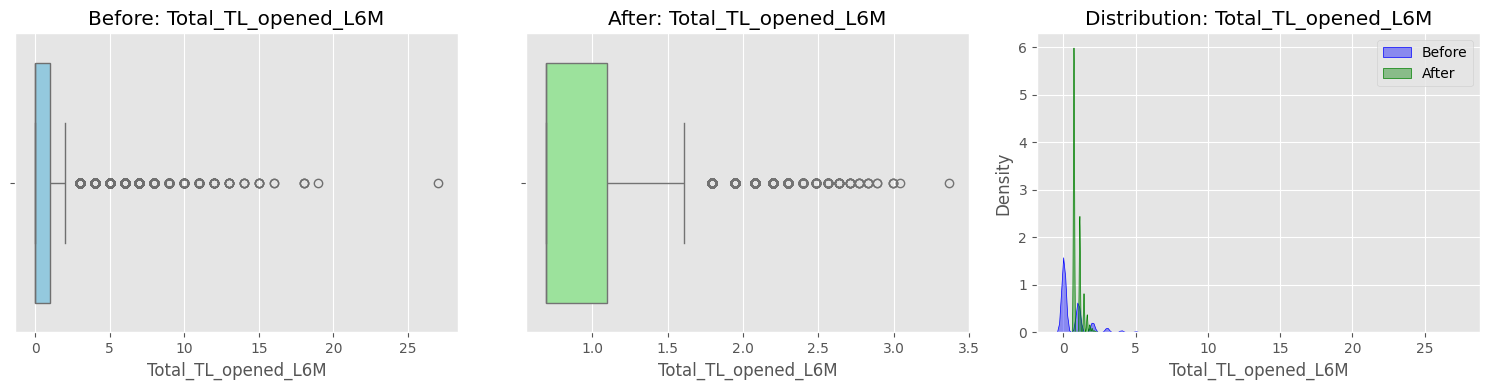

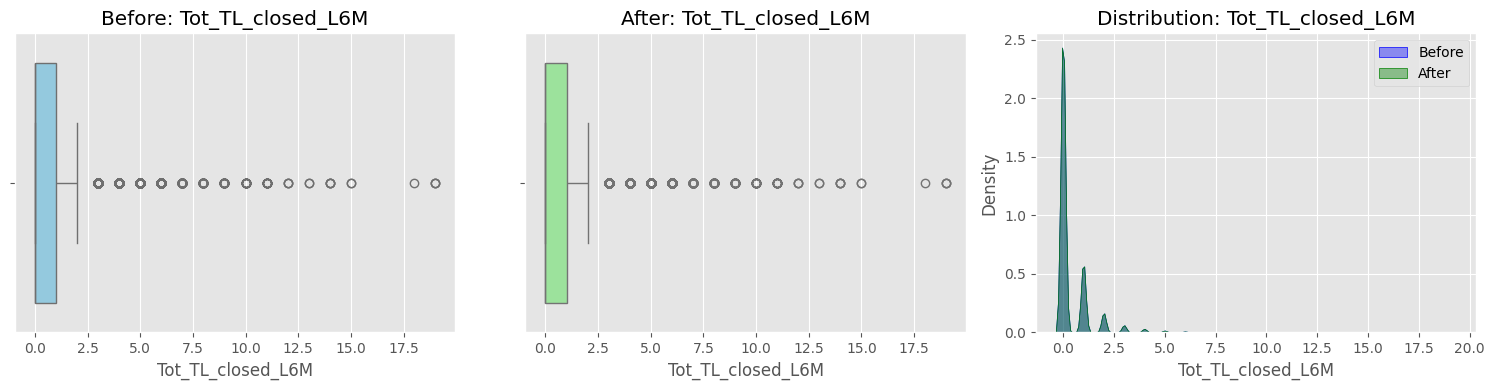

In [45]:
# Plot first 6 numerical columns

for col in num_cols[:6]:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Boxplots
    sns.boxplot(x=df_reg[col], ax=axes[0], color="skyblue")
    axes[0].set_title(f"Before: {col}")

    sns.boxplot(x=df_out[col], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"After: {col}")

    # Distribution comparison
    sns.kdeplot(df_reg[col], ax=axes[2], label="Before", fill=True, alpha=0.4, color="blue")
    sns.kdeplot(df_out[col], ax=axes[2], label="After", fill=True, alpha=0.4, color="green")
    axes[2].set_title(f"Distribution: {col}")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# **Feature Selection**


In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest, f_regression, f_classif

In [47]:
df_fs = df_out.copy()

In [48]:
# select the target column

possible_targets = ["TARGET", "target", "label", "PerformanceTag", "Target"]
target = None

for col in df_fs.columns:
    if col in possible_targets:
        target = col
        break

if target is None:
    target = df_fs.columns[-1]

print(f"Target column detected: {target}")

Target column detected: Approved_Flag


In [49]:
y = df_fs[target]
X = df_fs.drop(columns=[target])

In [50]:
if y.dtype == "object":
    y = LabelEncoder().fit_transform(y)

In [51]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [52]:
# categorical features encoding

if len(cat_cols) > 0:
    encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
    X_cat = encoder.fit_transform(X[cat_cols])
    selected_cat_features = encoder.get_feature_names_out(cat_cols)
    X_cat_selected = X_cat
else:
    selected_cat_features = []
    X_cat_selected = np.empty((len(X),0))

In [53]:
task = "classification"   # or "regression"
k = 20                    # number of top features to keep
force_keep = ["Credit_Score"]   # features you ALWAYS want to keep

In [54]:
if len(num_cols) > 0:

    X_num = X[num_cols]
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X_num)

    # Decide regression vs classification automatically
    if len(np.unique(y)) > 10:
        scores, p_values = f_regression(X_num_scaled, y)
    else:
        scores, p_values = f_classif(X_num_scaled, y)

    # Build DataFrame
    anova_df = pd.DataFrame({
        "Feature": num_cols,
        "F_Score": scores,
        "p_value": p_values
    })

    # Sort descending by F-score
    anova_df = anova_df.sort_values("F_Score", ascending=False).reset_index(drop=True)

    # Select top k features
    k = min(20, X_num.shape[1])
    top_features = anova_df.head(k)

    # Output
    print("\nANOVA/F-test scores (descending order):")
    print(anova_df)
    print(f"\nTop {k} numerical features (ANOVA/F-test):")
    print(top_features)

    # Keep top features
    selected_num_features = top_features["Feature"].values
    X_num_selected = X_num_scaled[:, [list(num_cols).index(f) for f in selected_num_features]]

else:
    selected_num_features = []
    X_num_selected = np.empty((len(X), 0))



ANOVA/F-test scores (descending order):
                     Feature       F_Score   p_value
0               Credit_Score  48176.395728  0.000000
1                    enq_L3m  10050.909413  0.000000
2              Age_Oldest_TL   7510.881154  0.000000
3                    enq_L6m   6558.459167  0.000000
4                   enq_L12m   4425.833247  0.000000
..                       ...           ...       ...
76            PL_utilization      0.896351  0.442098
77            CC_utilization      0.766058  0.512876
78  max_unsec_exposure_inPct      0.744868  0.525170
79     pct_currentBal_all_TL      0.651688  0.581789
80              num_lss_6mts      0.640636  0.588776

[81 rows x 3 columns]

Top 20 numerical features (ANOVA/F-test):
                   Feature       F_Score  p_value
0             Credit_Score  48176.395728      0.0
1                  enq_L3m  10050.909413      0.0
2            Age_Oldest_TL   7510.881154      0.0
3                  enq_L6m   6558.459167      0.0
4      

In [55]:
X_selected = np.hstack([X_cat_selected, X_num_selected])
selected_features = list(selected_cat_features) + list(selected_num_features)

df_selected = pd.DataFrame(X_selected, columns=selected_features, index=X.index)
df_selected[target] = y

print("\n Final selected dataset shape:", df_selected.shape)


 Final selected dataset shape: (51336, 39)


In [56]:
output_path = "selected_features.csv"
df_selected.to_csv(output_path, index=False)
print(f"Selected dataset saved to {output_path}")

Selected dataset saved to selected_features.csv


# Selecting Common Features

In [57]:
# training features (from your merged/cleaned dataset)
train_features = set(X.columns)

# unseen features (from your provided list)
unseen_features = set(unseen_df.columns)

# intersection
common_features = list(train_features.intersection(unseen_features))
print("Common features available for both training & unseen scoring:\n", common_features)

# keep only these for training
X_final = X[common_features]

Common features available for both training & unseen scoring:
 ['PL_enq_L12m', 'recent_level_of_deliq', 'MARITALSTATUS', 'Home_TL', 'Tot_Missed_Pmnt', 'Secured_TL', 'num_lss', 'pct_CC_enq_L6m_of_ever', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'PL_TL', 'time_since_recent_enq', 'Time_With_Curr_Empr', 'Age_Newest_TL', 'PL_Flag', 'num_dbt', 'pct_PL_enq_L6m_of_ever', 'last_prod_enq2', 'Other_TL', 'pct_tl_open_L6M', 'NETMONTHLYINCOME', 'CC_enq_L12m', 'Unsecured_TL', 'num_sub_12mts', 'GL_Flag', 'EDUCATION', 'HL_Flag', 'enq_L3m', 'time_since_recent_payment', 'num_deliq_6_12mts', 'max_recent_level_of_deliq', 'num_sub', 'pct_tl_closed_L6M', 'Age_Oldest_TL', 'first_prod_enq2', 'num_sub_6mts', 'CC_Flag', 'num_std_12mts', 'num_times_60p_dpd', 'GENDER', 'num_dbt_12mts', 'CC_TL']


# **Model Training**

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

In [59]:
# segregating columns for corresponding transformation

cat_cols = X_final.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_final.select_dtypes(exclude=["object"]).columns.tolist()

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols),
    ]
)

In [61]:
# split 80:20

y_final = y

X_train, X_val, y_train, y_val = train_test_split(
    X_final, y_final, test_size=0.2, random_state=17, stratify=y_final
)

In [62]:
# list of models to be used and compared among

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric="logloss"
    )
}

In [63]:
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)   # <--- preprocess + fit model
    y_pred = pipe.predict(X_val) # <--- preprocess + predict

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_val, y_pred, average="weighted")
    f1 = f1_score(y_val, y_pred, average="weighted")

    # ROC-AUC only if binary classification
    try:
        if len(np.unique(y)) == 2:
            y_prob = model.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, y_prob)
        else:
            auc = np.nan
    except:
        auc = np.nan

    results.append([name, acc, prec, rec, f1, auc])

C:\Users\soure\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [64]:
results_df = pd.DataFrame(
    results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]
)

print("\nModel Comparison Results:\n")
print(results_df.sort_values("F1-score", ascending=False))


Model Comparison Results:

                 Model  Accuracy  Precision    Recall  F1-score  ROC-AUC
6              XGBoost  0.799085   0.778296  0.799085  0.784061      NaN
1        Random Forest  0.787495   0.761890  0.787495  0.764618      NaN
0  Logistic Regression  0.777172   0.745775  0.777172  0.751136      NaN
3          Extra Trees  0.770744   0.743795  0.770744  0.743709      NaN
4        Decision Tree  0.723120   0.727815  0.723120  0.725347      NaN
2                  KNN  0.721757   0.699914  0.721757  0.703376      NaN
5          Naive Bayes  0.328496   0.564064  0.328496  0.331760      NaN


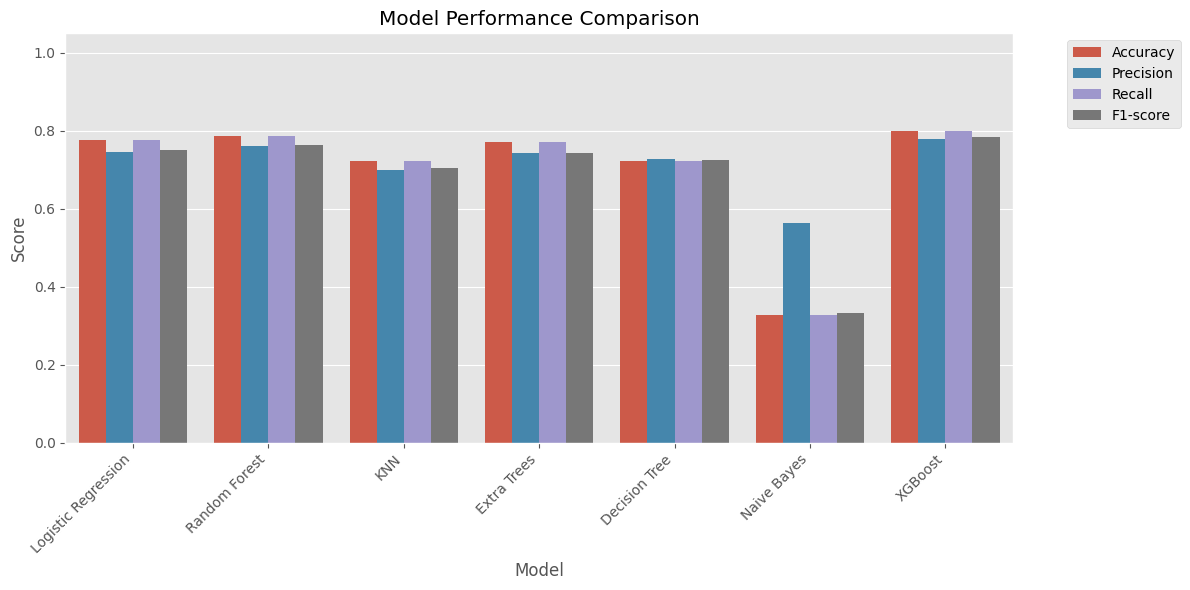

In [65]:
# visualization

plt.figure(figsize=(12, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

results_melted = results_df.melt(id_vars="Model", value_vars=metrics, var_name="Metric", value_name="Score")

sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)   # scores are scaled between 0 and 1
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

In [67]:
# Calculate sample weights for XGBoost
y_train = pd.Series(y_train)
class_counts = y_train.value_counts().sort_index()
total_samples = len(y_train)
sample_weights = np.ones(len(y_train))
for cls in class_counts.index:
    cls_weight = total_samples / (len(class_counts) * class_counts[cls])
    sample_weights[y_train == cls] = cls_weight


In [69]:
# Initialize SMOTE-Tomek
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42, n_jobs=-1)

# ============================================================================
# MODEL 1: XGBoost with Class Weights (Best for imbalanced data)
# ============================================================================
print("Training Model 1: XGBoost (Class Weights)...", end=" ")

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    eval_metric='mlogloss',
    tree_method='hist'
)

# Pipeline for XGBoost
xgb_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor.fit(X_train)),
    ("model", xgb_model)
])

# Fit with sample weights
X_train_processed = xgb_pipe.named_steps['preprocessor'].transform(X_train)
xgb_pipe.named_steps['model'].fit(X_train_processed, y_train, sample_weight=sample_weights)
print("✓")

Training Model 1: XGBoost (Class Weights)... ✓


In [71]:
from imblearn.pipeline import Pipeline as ImbPipeline
print("Training Model 2: Logistic Regression (SMOTE-Tomek)...", end=" ")

lr_model = LogisticRegression(
    max_iter=2000,
    C=0.1,
    solver='saga',
    penalty='elasticnet',
    l1_ratio=0.5,
    random_state=42,
    n_jobs=-1
)

lr_pipe = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote_tomek", smote_tomek),
    ("model", lr_model)
])

lr_pipe.fit(X_train, y_train)
print("✓")

Training Model 4: Logistic Regression (SMOTE-Tomek)... 

C:\Users\soure\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\soure\anaconda3\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\soure\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.u

✓


In [72]:
print("📊 STEP 2: INDIVIDUAL MODEL PERFORMANCE")
print("="*80 + "\n")

individual_results = []

models_to_evaluate = {
    "XGBoost (Class Weights)": xgb_pipe,
    
    "Logistic Regression (SMOTE-Tomek)": lr_pipe
    
}


📊 STEP 2: INDIVIDUAL MODEL PERFORMANCE



In [74]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

for name, model_pipe in models_to_evaluate.items():
    # Special handling for XGBoost
    if "XGBoost" in name:
        X_val_processed = model_pipe.named_steps['preprocessor'].transform(X_val)
        y_pred = model_pipe.named_steps['model'].predict(X_val_processed)
    else:
        y_pred = model_pipe.predict(X_val)
    
    acc = accuracy_score(y_val, y_pred)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    prec_macro = precision_score(y_val, y_pred, average="macro", zero_division=0)
    rec_macro = recall_score(y_val, y_pred, average="macro")
    f1_macro = f1_score(y_val, y_pred, average="macro")
    f1_weighted = f1_score(y_val, y_pred, average="weighted")
    
    individual_results.append([name, acc, balanced_acc, prec_macro, rec_macro, 
                              f1_macro, f1_weighted])

individual_df = pd.DataFrame(
    individual_results,
    columns=["Model", "Accuracy", "Balanced Accuracy", "Precision (Macro)", 
             "Recall (Macro)", "F1 (Macro)", "F1 (Weighted)"]
)

print(individual_df.to_string(index=False))
print("\n" + "="*80 + "\n")


                            Model  Accuracy  Balanced Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)  F1 (Weighted)
          XGBoost (Class Weights)  0.746202           0.762821           0.679174        0.762821    0.707541       0.761471
Logistic Regression (SMOTE-Tomek)  0.710460           0.728143           0.646769        0.728143    0.672200       0.728683




In [75]:
print("🚀 STEP 3: ENSEMBLE METHODS")
print("="*80 + "\n")

# Preprocess data once for ensembles
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)

# Apply SMOTE-Tomek for models that need it
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_prep, y_train)

# ============================================================================
# ENSEMBLE 1: Voting Classifier (Soft Voting) - ALL MODELS
# ============================================================================
print("Training Ensemble 1: Voting Classifier (All 2 Models)...", end=" ")

# Note: We need to create new fitted models for VotingClassifier
xgb_fitted = xgb.XGBClassifier(
    n_estimators=300, learning_rate=0.05, max_depth=6, min_child_weight=3,
    subsample=0.8, colsample_bytree=0.8, gamma=0.1, reg_alpha=0.1, 
    reg_lambda=1.0, random_state=42, eval_metric='mlogloss', tree_method='hist'
).fit(X_train_prep, y_train, sample_weight=sample_weights)

lr_fitted = LogisticRegression(
    max_iter=2000, C=0.1, solver='saga', penalty='elasticnet', 
    l1_ratio=0.5, random_state=42, n_jobs=-1
).fit(X_train_smote, y_train_smote)


🚀 STEP 3: ENSEMBLE METHODS



C:\Users\soure\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\soure\anaconda3\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\soure\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.u

Training Ensemble 1: Voting Classifier (All 5 Models)... 

In [77]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
voting_clf_all = VotingClassifier(
    estimators=[
        ('xgb', xgb_fitted),
        
        ('lr', lr_fitted)
        
    ],
    voting='soft',  # Soft voting uses predicted probabilities
    n_jobs=-1
)

voting_clf_all.fit(X_train_prep, y_train)
print("✓")

✓


In [78]:
print("Training Ensemble 2: XGBoost + Logistic Regression...", end=" ")

voting_clf_best = VotingClassifier(
    estimators=[
        ('xgb', xgb_fitted),
        ('lr', lr_fitted)
    ],
    voting='soft',
    n_jobs=-1
)

voting_clf_best.fit(X_train_prep, y_train)
print("✓")


Training Ensemble 2: XGBoost + Logistic Regression... ✓


In [80]:
print("Training Ensemble 3: Weighted Voting (XGBoost=2, Others=1)...", end=" ")

# Get best F1 scores to determine weights
best_f1 = individual_df.nlargest(2, 'F1 (Macro)')
print(f"\n  Top performers: {', '.join(best_f1['Model'].values)}")

voting_clf_weighted = VotingClassifier(
    estimators=[
        ('xgb', xgb_fitted),
        
        ('lr', lr_fitted)
    ],
    voting='soft',
    weights=[2, 1],  # XGBoost gets double weight
    n_jobs=-1
)

voting_clf_weighted.fit(X_train_prep, y_train)
print("✓")

Training Ensemble 3: Weighted Voting (XGBoost=2, Others=1)... 
  Top performers: XGBoost (Class Weights), Logistic Regression (SMOTE-Tomek)
✓


In [81]:
print("Training Ensemble 4: Stacking Classifier...", end=" ")

from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('xgb', xgb_fitted),
    
        ('lr', lr_fitted)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(X_train_prep, y_train)
print("✓")

Training Ensemble 4: Stacking Classifier... ✓


In [82]:
print("📊 STEP 4: ENSEMBLE MODEL PERFORMANCE")
print("="*80 + "\n")

ensemble_results = []

ensembles = {
    "Ensemble 1: All 5 Models (Soft Voting)": voting_clf_all,
    "Ensemble 2: XGBoost + LogReg": voting_clf_best,
    "Ensemble 3: Weighted Voting": voting_clf_weighted,
    "Ensemble 4: Stacking": stacking_clf
}

for name, ensemble in ensembles.items():
    y_pred = ensemble.predict(X_val_prep)
    
    acc = accuracy_score(y_val, y_pred)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    prec_macro = precision_score(y_val, y_pred, average="macro", zero_division=0)
    rec_macro = recall_score(y_val, y_pred, average="macro")
    f1_macro = f1_score(y_val, y_pred, average="macro")
    f1_weighted = f1_score(y_val, y_pred, average="weighted")
    
    ensemble_results.append([name, acc, balanced_acc, prec_macro, rec_macro, 
                            f1_macro, f1_weighted])

ensemble_df = pd.DataFrame(
    ensemble_results,
    columns=["Ensemble Model", "Accuracy", "Balanced Accuracy", "Precision (Macro)", 
             "Recall (Macro)", "F1 (Macro)", "F1 (Weighted)"]
)

print(ensemble_df.to_string(index=False))
print("\n" + "="*80 + "\n")

# ============================================================================
# STEP 5: FINAL COMPARISON - ALL MODELS
# ============================================================================
print("🏆 STEP 5: FINAL COMPARISON - INDIVIDUAL vs ENSEMBLE")
print("="*80 + "\n")

# Combine results
all_results = []

# Add individual models
for _, row in individual_df.iterrows():
    all_results.append(["Individual", row["Model"], row["Accuracy"], 
                       row["Balanced Accuracy"], row["Precision (Macro)"],
                       row["Recall (Macro)"], row["F1 (Macro)"], row["F1 (Weighted)"]])

# Add ensemble models
for _, row in ensemble_df.iterrows():
    all_results.append(["Ensemble", row["Ensemble Model"], row["Accuracy"],
                       row["Balanced Accuracy"], row["Precision (Macro)"],
                       row["Recall (Macro)"], row["F1 (Macro)"], row["F1 (Weighted)"]])

final_df = pd.DataFrame(
    all_results,
    columns=["Type", "Model", "Accuracy", "Balanced Accuracy", "Precision (Macro)",
             "Recall (Macro)", "F1 (Macro)", "F1 (Weighted)"]
)

print(final_df.sort_values("F1 (Macro)", ascending=False).to_string(index=False))


📊 STEP 4: ENSEMBLE MODEL PERFORMANCE

                        Ensemble Model  Accuracy  Balanced Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)  F1 (Weighted)
Ensemble 1: All 5 Models (Soft Voting)  0.794507           0.668254           0.725567        0.668254    0.685146       0.773269
          Ensemble 2: XGBoost + LogReg  0.794507           0.668254           0.725567        0.668254    0.685146       0.773269
           Ensemble 3: Weighted Voting  0.798403           0.675833           0.729720        0.675833    0.692457       0.778564
                  Ensemble 4: Stacking  0.799571           0.692260           0.728554        0.692260    0.706515       0.787803


🏆 STEP 5: FINAL COMPARISON - INDIVIDUAL vs ENSEMBLE

      Type                                  Model  Accuracy  Balanced Accuracy  Precision (Macro)  Recall (Macro)  F1 (Macro)  F1 (Weighted)
Individual                XGBoost (Class Weights)  0.746202           0.762821           0.679174        0.762821   